In this dataset will be used to predict if a pepson will be affected by a heart disease or not. The data set contains 11 features that can be used to predict if there is a  possiblity of heart disease.

Attributes 

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar 

RestingECG: resting electrocardiogram results [Normal: Normal, ST:abnormality ]

MaxHR: maximum heart rate 

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
import pandas as pd 
hr = pd.read_csv("heart.csv")

In [ ]:
hr.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
hr.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
hr.Sex.replace( { "M" : 0, "F" :1} , inplace = True)
hr.ExerciseAngina.replace( { "N" :0 , "Y" :1} , inplace = True)
hr.ST_Slope.replace( {"Up": 0, "Flat" :1,"Down":2} , inplace = True)
hr.RestingECG.replace( {"Normal":0 , "ST" :1,"LVH":2} , inplace = True)
hr.ChestPainType.replace( {"ATA":0 , "NAP" :1,"ASY":2,"TA":3} , inplace = True)
hr.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [ ]:
hr_x = hr.iloc[: , 0:11]
hr_y = hr.iloc[: , -1]

In [ ]:
hr_x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,0,140,289,0,0,172,0,0.0,0
1,49,1,1,160,180,0,0,156,0,1.0,1
2,37,0,0,130,283,0,1,98,0,0.0,0
3,48,1,2,138,214,0,0,108,1,1.5,1
4,54,0,1,150,195,0,0,122,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1
914,68,0,2,144,193,1,0,141,0,3.4,1
915,57,0,2,130,131,0,0,115,1,1.2,1
916,57,1,0,130,236,0,2,174,0,0.0,1


In [ ]:
hr_y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
hr_x_train , hr_x_test ,hr_y_train , hr_y_test = train_test_split(hr_x , hr_y , test_size = .2 , random_state = 101)

In [ ]:
hr.shape

(918, 12)

In [ ]:
print(hr_x_train.shape)
print(hr_y_train.shape)

(734, 11)
(734,)


In [ ]:
print(hr_x_test.shape)
print(hr_y_test.shape)

(184, 11)
(184,)


In [ ]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

This data set falls under the catogery of clasification.

I will be implementing three diffrent type of clasification algorithms such as Random Forest Classifier,Decision Tree and K Nearest Neighbour model and will be determining which is the best.

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100)

In [ ]:
rfc.fit(hr_x_train, hr_y_train)

RandomForestClassifier()

In [ ]:
pred_rf=rfc.predict(hr_x_test )
pred_rf

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
tab1 = confusion_matrix(pred_rf , hr_y_test)
tab1

array([[65, 14],
       [14, 91]])

In [ ]:
ns1=tab1.diagonal().sum() / tab1.sum() * 100
ns1

84.78260869565217

In [ ]:
rfc.feature_importances_ 

array([0.08241687, 0.03797723, 0.08889311, 0.06723428, 0.11545277,
       0.02689321, 0.02404267, 0.12277101, 0.1070538 , 0.09686484,
       0.2304002 ])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(hr_y_test, pred_rf)


0.8478260869565217

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier( )
dtree.fit(hr_x_train, hr_y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt =dtree.predict(hr_x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred_dt , hr_y_test)
tab1

array([[65, 21],
       [14, 84]])

In [ ]:
ns2=tab1.diagonal().sum() / tab1.sum() * 100
ns2

80.97826086956522

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 6) 
knn.fit(hr_x_train , hr_y_train) 

KNeighborsClassifier(n_neighbors=6)

In [ ]:
pred_knn = knn.predict(hr_x_test) 
pred_knn

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix 
tab1 = confusion_matrix(pred_knn , hr_y_test) 
tab1 


array([[53, 42],
       [26, 63]])

In [ ]:
ns3=tab1.diagonal().sum() / tab1.sum() * 100 
ns3

63.04347826086957

Text(0.5, 1.0, 'Best Algorithm')

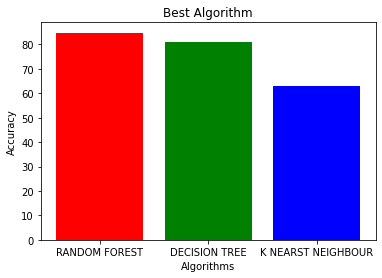

In [ ]:
alg = ['RANDOM FOREST','DECISION TREE','K NEARST NEIGHBOUR']
values = [ns1,ns2,ns3]
plt.bar(alg,values,color=['red','green','blue'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Best Algorithm')

With this bar graph we can see that Random Forest Classifier has the highest accuracy that is 84.7. Hence for Heart Failure Prediction Random Forest is the most suitable algorithm 

<Figure size 1440x720 with 0 Axes>

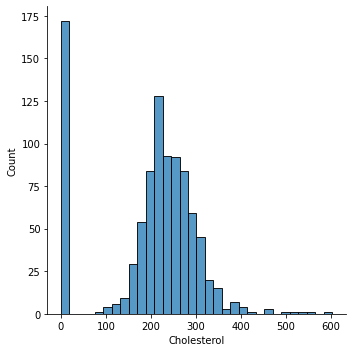

In [ ]:
#Seaborn is a Python data visualization library based on matplotlib.
#It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns 
plt.figure(figsize = (20, 10))
sns.displot(hr['Cholesterol'])
plt.show()

This graph shows the rage of colestrol level of all the entries in the data set

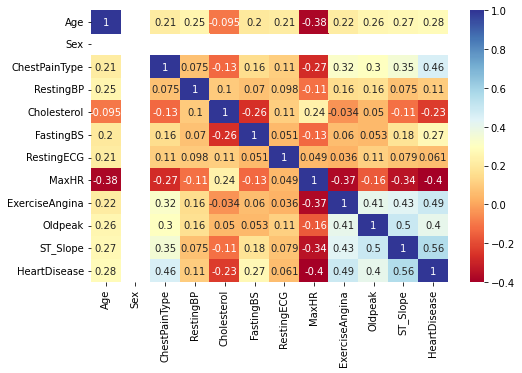

In [ ]:
#A heatmap is a graphical representation of data that uses a system of color-coding to represent different values
plt.figure(figsize=(8,5))
sns.heatmap(hr.corr(), annot=True, cmap='RdYlBu')

The purpose of this map is to show the range of values in the data set and give a colour feel to it for better understanding.From the heat map we can see the darker colurs(dark orange and red) shows the high values and the lighter colours(dark blue and light blue show low values of the data set.

In [ ]:
gf=hr.Sex==0
df5=hr[gf]
df6=df5.HeartDisease==1
df7=df5[df6]
hf=hr.Sex==0
df8=hr[hf]
df9=df8.HeartDisease==1
df10=df8[df9]


Text(0, 0.5, 'count')

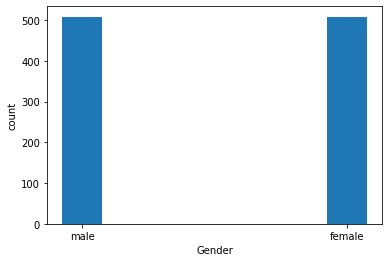

In [ ]:
alg=["male","female"]
values = [len(df7),len(df10)]
plt.bar(alg,values,width=+0.15)
plt.xlabel('Gender')
plt.ylabel('count')


From this graph we can conclude both male and female are equally prone to heart diseases

In [ ]:
af=hr.ChestPainType ==2
df1=hr[af]
bf=hr.ChestPainType ==1
df2=hr[bf]
cf=hr.ChestPainType ==0
df3=hr[cf]
ef=hr.ChestPainType ==3
df4=hr[ef]

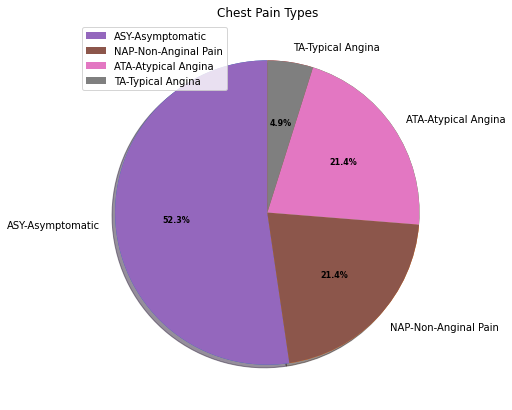

In [ ]:
import numpy as np
activities=['ASY-Asymptomatic','NAP-Non-Anginal Pain','ATA-Atypical Angina','TA-Typical Angina']
slices=[len(df1),len(df2),len(df2),len(df4)]
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(slices, autopct = lambda pct: func(pct, slices),startangle = 90,textprops = dict(color ="black"))    
plt.pie(slices,labels=activities,startangle=90,shadow=True,)
plt.setp(autotexts, size = 8, weight ="bold")
plt.title("Chest Pain Types")
plt.legend()
plt.show()


This pie chart show the diffrent kinds of chest pain people experience. Using numpy and a formula the percentage of people experiencing the type of pain is also displayed.